In [147]:
import numpy as np
import pandas as pd

In [148]:
DATASET = 'pattern_trend10'
ORIG = 'trend'
FILE = 'trend10'

In [76]:
def abs_normalize(a):
    a = a / np.maximum(np.absolute(a.max(axis=0)), np.absolute(a.min(axis=0)))
    a = np.nan_to_num(a)
    return (a / 2 + 0.5)

In [39]:
from sklearn.preprocessing import MinMaxScaler

def scale_data(train, test, validation):
    scaler = MinMaxScaler(feature_range=(0, 1), clip=True).fit(train)

    train_scaled = scaler.transform(train)
    test_scaled = scaler.transform(test)
    validation_scaled = scaler.transform(validation)

    return train_scaled, test_scaled, validation_scaled

/root/.conda/envs/py3.9test/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [149]:
time_series = pd.read_csv(f'{FILE}_train_test_val.csv')
time_series.head()

,col_0,col_1,col_2,col_3,col_4,anomaly
0,-0.131232,2.607850,0.066011,4.381993,-1.894449,0
1,0.398736,2.403965,0.442701,4.554839,-1.530790,0
2,0.809108,2.170690,0.702547,3.998227,-1.414847,0
3,1.007888,1.874675,1.006700,3.990737,-0.910490,0
4,1.340091,1.311106,1.337947,3.413961,-0.720344,0


In [150]:
train_time_series = time_series[:20000]
train_time_series.head()

,col_0,col_1,col_2,col_3,col_4,anomaly
0,-0.131232,2.607850,0.066011,4.381993,-1.894449,0
1,0.398736,2.403965,0.442701,4.554839,-1.530790,0
2,0.809108,2.170690,0.702547,3.998227,-1.414847,0
3,1.007888,1.874675,1.006700,3.990737,-0.910490,0
4,1.340091,1.311106,1.337947,3.413961,-0.720344,0


In [152]:
print(train_time_series['col_4'].min())
print(train_time_series['col_4'].max())

-15.097620609417833
85.04304598705383


In [79]:
test_time_series = time_series[20000:40000]
test_time_series.head()

,col_0,col_1,col_2,col_3,col_4,anomaly
20000,0.113480,2.541960,0.002418,4.413778,2.513933,0
20001,0.425330,2.352705,0.402986,4.343363,2.861954,0
20002,0.593477,2.385319,0.795860,4.250515,3.343678,0
20003,0.990708,1.682974,1.020078,3.947763,3.418243,0
20004,1.328372,1.452374,1.258230,3.126827,3.671927,0


In [80]:
val_time_series = time_series[40000:]
val_time_series.head()

,col_0,col_1,col_2,col_3,col_4,anomaly
40000,-0.094802,2.652171,0.018939,4.550506,-6.491240,0
40001,0.359750,2.256046,0.331234,4.466656,-6.159894,0
40002,0.823503,2.183344,0.822009,4.316569,-5.682100,0
40003,1.080265,1.816790,1.056659,3.858038,-5.463839,0
40004,1.248927,1.374257,1.238567,3.136138,-5.198222,0


In [81]:
train_labels = train_time_series.anomaly.to_numpy()
test_labels = test_time_series.anomaly.to_numpy()
val_labels = val_time_series.anomaly.to_numpy()

In [82]:
train_no_labels = train_time_series.drop(['anomaly'], axis=1).to_numpy()
test_no_labels = test_time_series.drop(['anomaly'], axis=1).to_numpy()
val_no_labels = val_time_series.drop(['anomaly'], axis=1).to_numpy()
print('Train ', train_no_labels.shape)
print('Test: ', test_no_labels.shape)
print('Val: ', val_no_labels.shape)

Train  (20000, 5)
Test:  (20000, 5)
Val:  (10000, 5)


In [83]:
train_ratio = (train_labels.sum() / train_labels.shape[0]) * 100
val_ratio = (val_labels.sum() / val_labels.shape[0]) * 100
print('Train ratio: ', train_ratio)
print('Val ratio: ', val_ratio)

Train ratio:  1.01
Val ratio:  0.8999999999999999


In [91]:
if ORIG != 'pattern_trend':    
    train_normalized = abs_normalize(train_no_labels)
    val_normalized = abs_normalize(val_no_labels)
    test_normalized = abs_normalize(test_no_labels)
    print('normalized dataset')

normalized dataset


In [67]:
def expand_labels(data, labels):
    labels_reshaped = np.zeros_like(data)
    for idx in range(0, len(labels)):
        if labels[idx]:
            labels_reshaped[idx][0:labels_reshaped.shape[1]] = 1
    return labels_reshaped

In [14]:
# val_labels_reshaped = expand_labels(val_normalized, val_labels)
# test_labels_reshaped = expand_labels(test_normalized, test_labels)

In [28]:
# FOR RATIO ABLATION
#test5 = np.load(f'../processed/{ORIG}/test.npy')
#labels5 = np.load(f'../processed/{ORIG}/labels.npy')

In [113]:
from sklearn.preprocessing import MinMaxScaler

def scale_test(test):
    scaler = MinMaxScaler(feature_range=(0, 1)).fit(test)

    #train_scaled = scaler.transform(train)
    test_scaled = scaler.transform(test)

    return test_scaled

In [153]:
trend5_series = pd.read_csv('trend_train_test_val.csv')
test_trend5 = trend5_series[20000:40000]
#labels5 = test_trend5.anomaly.to_numpy()
#test_trend5 = test_trend5.drop(['anomaly'], axis=1).to_numpy()
#labels5 = expand_labels(test_trend5, labels5)

In [154]:
print(test_trend5['col_4'].min())
print(test_trend5['col_4'].max())

-97.97744390787436
-1.0244058283630473


In [117]:
#ratio = 1
#ds = f'pattern_trend{ratio}_test5'
#test5_normalized = scale_test(train_no_labels, test_trend5)
test5_normalized = scale_test(test_trend5)
#np.save(f'../processed/{ds}/test.npy', normalized_test_for_ds)
#np.save(f'../processed/{ds}/labels.npy', labels_5_expanded)

In [16]:
# if ORIG == 'pattern_trend':
#     train_normalized, test5_normalized, val_normalized = scale_data(train_no_labels, test5, val_no_labels)
#     print('normalized trend')

normalized trend


In [115]:
val_labels_reshaped = expand_labels(val_normalized, val_labels)
#test_labels_reshaped = expand_labels(test_normalized, test_labels)

In [118]:
import os 
os.makedirs(f'../processed/{DATASET}_test5', exist_ok=True)
# np.save(f'../processed/{DATASET}_test5/train.npy', train_normalized)
if ORIG != 'pattern_trend' and ORIG != 'trend':
    np.save(f'../processed/{DATASET}_test5/test.npy', test5)
    print('saved NOT trend')
else:
    np.save(f'../processed/{DATASET}_test5/test.npy', test5_normalized)
    print('saved trend')
np.save(f'../processed/{DATASET}_test5/labels.npy', labels5)
# np.save(f'../processed/{DATASET}_test5/validation.npy', val_normalized)
# np.save(f'../processed/{DATASET}_test5/labels_validation.npy', val_labels_reshaped)

saved trend


In [71]:
labels_5_reshaped.shape

(20000, 5)

In [145]:
import numpy as np
train = np.load('../processed/pattern_trend15_test5/train.npy')

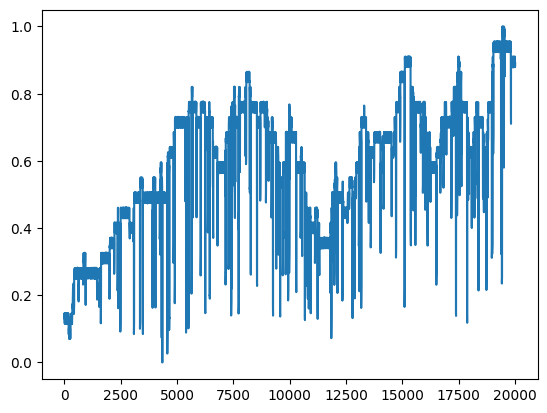

In [144]:
import matplotlib.pyplot as plt
plt.plot(train[:, 4])

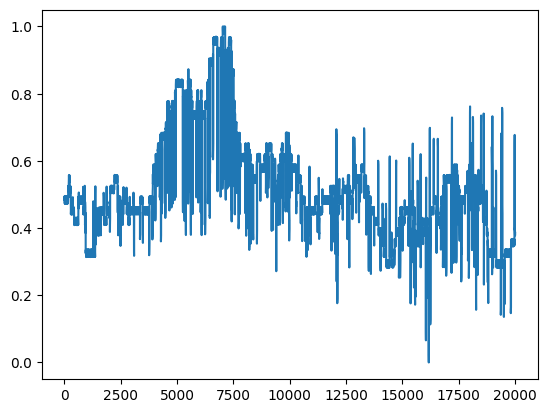

In [146]:
import matplotlib.pyplot as plt
plt.plot(train[:, 4])

In [85]:
np.save(f'../processed/{DATASET}_test5/labels.npy', labels5)